# Session 1: Mathematical Modeling and Simulation of Quantum Systems
# (Completed Notebook)

In this session we introduce the basic mathematical formalism of quantum information processing and how to manipulate this mathematical formalism in Python using NumPy and Qiskit. This both re-inforces concepts in the lecture and introduces useful syntax in Numpy and Qiskit.

## Setting Up the Notebook

These are just the commands for importing the packages we will use.

In [ ]:
# Install qiskit and graphical representation we will use
!pip install qiskit
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.6 MB/s eta 0:00:00


In [ ]:
# Import relevant code from Qiskit
from qiskit import *
from qiskit.circuit.library import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_aer import AerSimulator

In [ ]:
# Import numpy
import numpy as np
from numpy import sqrt #So we don't have to call math function

## Exercises 1: Working with Quantum States

We saw quantum states are unit vectors
$$ \vert \psi \rangle = \sum_{i} \alpha_{i} \vert i \rangle = \begin{bmatrix} \alpha_{0} \\ \alpha_{1} \\ \vdots \\ \alpha_{d} \end{bmatrix} \ . $$
It follows we can represent them using packages that handle linear algebra. We will start by using NumPy. For example, we can declare the qubit state $\vert + \rangle = \frac{1}{\sqrt{2}}\left( \vert 0 \rangle + \vert 1 \rangle \right)$ as a vector in numpy via


```
  plus_state = 1/math.sqrt(2) * np.array([1,1])
```
Here we explore quantum states more using numerical methods.



**Problem 1.1** Initialize the following states:

$\vert 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\vert 1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$, $\vert + \rangle = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$, $\vert - \rangle = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix}$, $\vert \widetilde{+} \rangle = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i \end{bmatrix}$, $\vert \widetilde{-} \rangle = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -i \end{bmatrix} \  $ \\
by intializing $\vert 0 \rangle$ and $\vert 1 \rangle$ and using linearity to intialize the others.

**Note:** The complex number $\alpha = 5 + i6$ is initialized as

```
  alpha = 5+6j
```




In [ ]:
zero_state = np.matrix([[1],[0]]) #Note the extra brackets so that this is a column vector
one_state = np.matrix([[0],[1]])
plus_state = 1/sqrt(2) * (zero_state + one_state)
minus_state = 1/sqrt(2) * (zero_state - one_state)
ptilde_state = 1/sqrt(2) * (zero_state + 1j * one_state)
mtilde_state = 1/sqrt(2) * (zero_state - 1j * one_state)

**Problem 1.2** It turns out that the pairs $\{\vert 0 \rangle, \vert 1 \rangle \}$, $\{\vert + \rangle, \vert - \rangle \}$, $\{\vert \widetilde{+} \rangle, \vert \widetilde{-} \rangle \}$ each form a basis for $\mathbb{C}^{2}$, i.e. qubits. It follows they can be expressed by eachother. Verify the following identities:


a.   $\vert 0 \rangle = \frac{1}{\sqrt{2}}\left(\vert + \rangle + \vert - \rangle \right)$ \\
b.   $\vert 1 \rangle = \frac{-i}{\sqrt{2}}\left(\vert \widetilde{+} \rangle - \vert \widetilde{-} \rangle \right)$

**Note:** One option for comparision to use the function `np.isclose()`.





In [ ]:
np.isclose(1/sqrt(2)*(plus_state+minus_state),zero_state)

matrix([[ True],
        [ True]])

In [ ]:
np.isclose(-1j/sqrt(2)*(ptilde_state-mtilde_state),one_state)

matrix([[ True],
        [ True]])

We saw we can look at the "overlap" between quantum states $\vert \psi \rangle$, $\vert \phi \rangle$ by their inner product: $\langle \psi \vert \phi \rangle$. This can be computed by taking the complex conjugate of $\vert \psi \rangle$ and multiplying it by $\vert \phi \rangle$.

**Problem 1.3** Calculate the overlaps and norm of some of the states declared in Problem 1.1. In particular, determine: \\
1. Inner product $\langle \widetilde{+} \vert - \rangle$
2. Overlap $\vert \langle \widetilde{+} \vert - \rangle \vert^{2}$ (note the difference is this is the absolute value squared)
3. Inner product $\langle \widetilde{+} \vert \widetilde{-} \rangle$
4. The states are unit vectors, e.g. $\vert \langle 0 \vert 0 \rangle \vert^{2} = 1$.

Write down how you think these calculations result to Problem 1.2 as well as the Bloch sphere picture shown in the lecture slides.

**Syntax Hint:** In NumPy, the complex conjugate of a matrix (and thus vector) `M` is returned via `M.H`. Thus, we can compute $\vert \widetilde{-} \vert \widetilde{-} \vert^{2}$  via


```
  abs(mtilde_state.H * mtilde_state)**2
```



In [ ]:
#1.3.1
print(ptilde_state.H*minus_state)

#1.3.2
print(abs(ptilde_state.H*minus_state)**2)

#1.3.3
print(ptilde_state.H*mtilde_state)

#1.3.4
print(ptilde_state.H*ptilde_state)
print(ptilde_state.H*mtilde_state)

[[0.5+0.5j]]
[[0.5]]
[[0.+0.j]]
[[1.+0.j]]
[[0.+0.j]]


**Answer** The above shows that the overlaps between each state in a different basis is 1/2. This sort of makes sense as each state is like a halfway point along the Bloch sphere between the two points of a different basis. We also see that each pair given in Problem 1.2 forms an orthonormal basis because they are pairwise orthogonal unit vectors.

**Problem 1.4 (Statevector in Qiskit)** We have now seen some structure of qubit states using NumPy. Qiskit handles quantum states in effectively the same manner, but has its own class `Statevector`, which we will use for clarity. For example, we can define the statevector for the zero state using


```
  sv_mtilde = Statevector(mtilde_state)
```

We can also verify this works using the print function for the state vector, e.g.

```
  print(sv_mtilde)
```

a. Copy the code above and verify it works as you would expect. Note that the Statevector is a class that includes the dimension of the system. \\
b. Declare `sv_psi = Statevector(1/sqrt(0.58)*np.array([0.3,0.7]))` and verify the print methods still work. This shows you can define the array used in the state vector function directly. \\
c. Verify that `np.vdot()`, another way of calculating inner product, works on Statevectors. \\
d. Define a statevector for a qutrit (three-dimensional quantum system) of your choice \\

In [ ]:
#1.4.a
sv_mtilde = Statevector(mtilde_state)
print(sv_mtilde)

Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


In [ ]:
#1.4.b
sv_psi = Statevector(1/sqrt(0.58)*np.array([0.3,0.7]))
print(sv_psi)

Statevector([0.3939193 +0.j, 0.91914503+0.j],
            dims=(2,))


In [ ]:
#1.4.c
np.vdot(sv_mtilde,sv_mtilde)

(0.9999999999999998+0j)

In [ ]:
#1.4.d
sv_phi = Statevector(1/sqrt(3)*np.array([1,1,1]))
print(sv_phi)

Statevector([0.57735027+0.j, 0.57735027+0.j, 0.57735027+0.j],
            dims=(3,))


## Exercises 2: Working with Unitaries (a.k.a. Quantum Gates)

We just saw that a unitary $U$ acting on vector space $\mathbb{C}^{d}$ is a $d \times d$ matrix satisfying $U^{\dagger}U = \mathbb{1}_{\mathbb{C}^{d}} = UU^{\dagger}$ where $M^{\dagger}$ is the conjugate transpose of a matrix $M$. Here we investigate some specific examples of such unitaries.

**Syntax Note:** Recall in NumPy, given a (complex) matrix `M = np.matrix([[a,b],[c,d]])`, `M.H` returns $M^{\dagger}$.

**Problem 2.1 (Pauli Matrices)** The Pauli matrices,
$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \quad Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}  \ , $$ are integral to quantum information theory. Here we explore a few properties of them numerically. \\
a. Declare the Pauli matrices as matrices via NumPy. \\
b. Verify that $M^{\dagger} = M$ for $M \in \{X,Y,Z\}$. \\
c. Verify that each is a unitary. \\
d. Verify $ZX = -i Y$ and $XZ = i Y$. This highlights that matrix multiplication *does not commute*, which is crucial in quantum mechanics.

**Syntax Note:** For matrices, NumPy denotes matrix multiplication with `*`, e.g. multiplying matrices `M` and `N` can be written `M * N`.

In [ ]:
#2.1.a
PauliX = np.matrix([[0,1],[1,0]])
PauliY = np.matrix([[0,-1j],[1j,0]])
PauliZ = np.matrix([[1,0],[0,-1]])

In [ ]:
#2.1.b
PauliX - PauliX.H== np.matrix([[0,0],[0,0]])
PauliY - PauliY.H== np.matrix([[0,0],[0,0]])
PauliZ - PauliZ.H== np.matrix([[0,0],[0,0]])

matrix([[ True,  True],
        [ True,  True]])

In [ ]:
#2.1.c
PauliX.H * PauliX == np.matrix([[1,0],[0,1]])
PauliY.H * PauliY == np.matrix([[1,0],[0,1]])
PauliZ.H * PauliZ == np.matrix([[1,0],[0,1]])

matrix([[ True,  True],
        [ True,  True]])

In [ ]:
#2.1.d
PauliZ * PauliX == 1j * PauliY
PauliX * PauliZ == -1j * PauliY

matrix([[ True,  True],
        [ True,  True]])

**Problem 2.2 (Pauli Matrices acting on Qubits)** Given Problem 2.1.d, we can focus on $X,Z$, which have interpretations as being the "bit flip" and "phase flip" operator respectively as we now verify. \\
a. Verify $X\vert 0 \rangle = \vert 1 \rangle$, $X \vert 1 \rangle = \vert 0 \rangle$. Why does this make it the "bit flip" operator? (**Syntax Hint** By our syntax, vectors are treated as matrices.) \\
b. Verify $Z\vert 0 \rangle = \vert 0 \rangle$, $Z \vert 1 \rangle = -\vert 1 \rangle$. This make it the "phase flip" operator as it flips the `phase' (from one to negative one) when the input is the $\vert 1 \rangle$.

In [ ]:
#2.2.a
print(PauliX * zero_state == one_state)
print(PauliX * one_state== zero_state)

[[ True]
 [ True]]
[[ True]
 [ True]]


**Answer:** This is the "bit flip" operator as if we encode classical information in the computational basis, $\sigma_{X}$ will flip the value of the bit.

In [ ]:
#2.2.b
print(PauliZ * zero_state == zero_state)
print(PauliZ * one_state== -1*one_state)

[[ True]
 [ True]]
[[ True]
 [ True]]


**Problem 2.3 (Hadamard Gate)** The Hadamard gate,
$$ H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & - 1 \end{bmatrix} \ ,  $$
is the remaining `one-qubit' gate we will use. \\
a. Declare the Hadamard gate via NumPy. \\
b. Verify that $H^{\dagger} = H$. \\
c. Verify that $H\vert 0 \rangle = \vert + \rangle$, $H\vert + \rangle = \vert 0 \rangle$, $H\vert 1 \rangle = \vert - \rangle$, and $H\vert - \rangle = \vert + \rangle$. What does this tell you?

In [ ]:
#2.3.a
H = 1/sqrt(2)*np.matrix([[1,1],[1,-1]])

In [ ]:
#2.3.b
H-H.H == np.zeros(2)

matrix([[ True,  True],
        [ True,  True]])

In [ ]:
#2.3.c
print(H * zero_state == plus_state)
print(H * one_state == minus_state)

[[ True]
 [ True]]
[[ True]
 [ True]]


In [ ]:
H*plus_state

matrix([[1.00000000e+00],
        [2.23711432e-17]])

In [ ]:
H*minus_state

matrix([[2.23711432e-17],
        [1.00000000e+00]])

**Answer:** This tells us that the Hadamard moves us between these two bases.

**Problem 2.4 (Quantum Circuits in Qiskit)** A quantum circuit is one large unitary that is built out of a sequence of "smaller" quantum unitaries called "quantum gates." Qiskit gives a simple manner for writing down quantum circuits. By appending common gates to the circuit to build it up and printing out the circuit to verify it does what one wants. \\

a. Copy and run the following code snippet.


```
  num_qubits = 1
  qc = QuantumCircuit(num_qubits)
  qc.x(0)
  qc.h(0)
  print(qc)
```
Note that what it does is apply the Pauli $X$ gate to the single qubit and then the Hadamard gate $H$ afterwards. It acts on the "zero-th" register as we use computer science indexing. \\

b. Given the above code snippet, define a circuit that applies a Hadamard gate, then a Z gate, then an X gate, then a H gate, and finally a Z gate again. Verify this worked by printing the circuit. As one might imagine, to implement the Z gate on the zero-th register, one may use `qc.z(0)`.



In [ ]:
#2.4.a
num_qubits = 1
qc = QuantumCircuit(num_qubits)
qc.x(0)
qc.h(0)
print(qc)

   ┌───┐┌───┐
q: ┤ X ├┤ H ├
   └───┘└───┘


In [ ]:
#2.4.b
num_qubits = 1
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.z(0)
qc.x(0)
qc.h(0)
qc.z(0)
print(qc)

   ┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ Z ├┤ X ├┤ H ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘


## Exercises 3 (A Complete Circuit Implementation)

We have now introduced measurements, which were the last piece to implementing a quantum circuit. We will now build a circuit for a quantum random number generator using Qiskit. We will do this in steps to learn the syntax.

### Problem 3.1 - No Simulator

We begin by implementing the circuit in a manner that does not use a noisy simulator. This is to make sure we understand the conceptual point first.

**Problem 3.1.a** Before we used a single quantum register. We will in the second version also need a classical register to store the output of the measurement, so we introduce it here for simplicity. Input the code

```
  num_qubits = 1
  num_cbits = 1
  qc = QuantumCircuit(num_qubits,num_cbits)
```
and then print it to see what displays. Note the output should be very minimal, but it should display something that makes it clear to you there is one quantum register and one classical register.



In [ ]:
  #3.1.a
  num_qubits = 1
  num_cbits = 1
  qc = QuantumCircuit(num_qubits,num_cbits)
  print(qc)

     
  q: 
     
c: 1/
     


**Problem 3.1.b** Now apply a Hadamard gate to the quantum register. The syntax should be clear from Exercises 2. Print your circuit to make sure it looks correct.

In [ ]:
#3.1.b
num_qubits = 1
num_cbits = 1
qc = QuantumCircuit(num_qubits,num_cbits)
qc.h(0)
print(qc)

     ┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════
          


We will now run this circuit on input states using the `Statevector` function introduced in Exercises 1. The `Statevector` class has a method `probabilities_dict()` which returns the output probabilities of measuring the given quantum state in the computational basis.

**Problem 3.1.c** Initialize the state $\vert 0 \rangle$ and look at its measurement outcomes in the computational basis using the `plot_histogram' function. Explain the answer given the lecture's explanation of measurements.

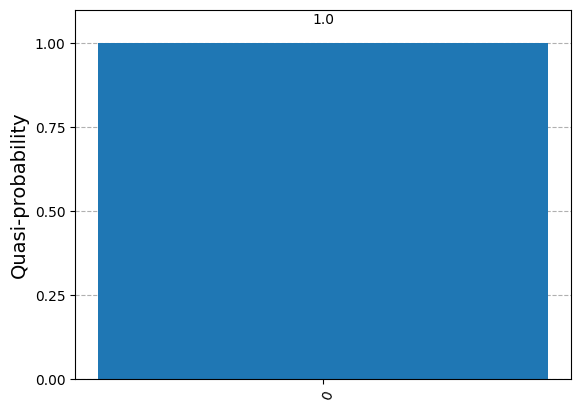

In [ ]:
#3.1.c
init_sv = Statevector(np.array([1,0]))
init_probs = init_sv.probabilities_dict()
plot_histogram(init_probs)

**Answer:** The outcome is always $\vert 0 \rangle$ because we prepared a computational basis state and measured in the computational basis state, so we may use Born's rule to verify the probability of outcome $\vert 0 \rangle$ is $1$.

**Problem 3.1.d** The `evolve(circuit)` method for `Statevector` applies the mathematical representation of `circuit`. Use

```
  final_sv = init_sv.evolve(qc)
```
and then print the output probabilities as we did before. What does this tell you? Combining everything we have seen in lecture so far, explain why this is the case?

**Hint:** If you don't know why it is the case, think about what the Hadamard gate does.





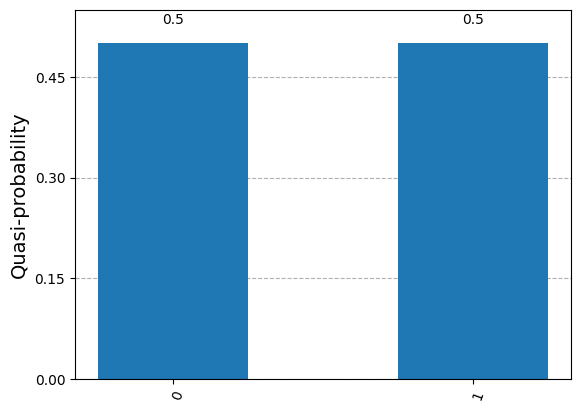

In [ ]:
#3.1.d
final_sv = init_sv.evolve(qc)
final_probs = final_sv.probabilities_dict()
plot_histogram(final_probs)

**Answer:** The histogram shows us that both computational outcomes have probability 1/2. This means we have built a random number generator. The reason this works is because $H\vert 0 \rangle = \vert + \rangle = \frac{1}{\sqrt{2}}\left(\vert 0 \rangle + \vert 1 \rangle \right)$ so by Born's rule, the probability of each outcome is $(\frac{1}{\sqrt{2}})^{2} = \frac{1}{2}$.

**Problem 3.1.e** What happens if instead the initial vector is $\vert + \rangle$? Guess and numerically verify. Also feel free to see what happens for other input states.

**Guess:** It should not work as a random generator because $H\vert + \rangle = \vert 0 \rangle$ so the outcome will always be $\vert 0 \rangle$. If we modify the input, we can bias the distribution.

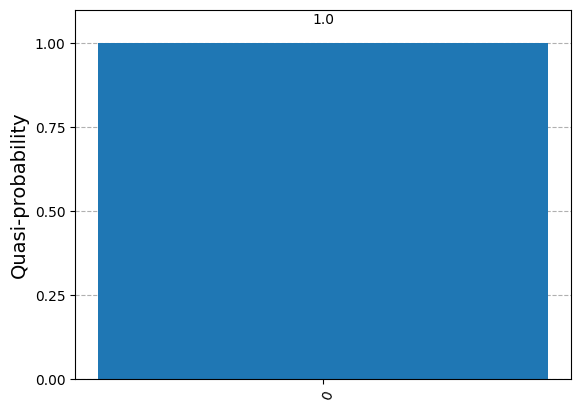

In [ ]:
#3.1.e
init_sv = Statevector(1/sqrt(2)*np.array([1,1]))
final_sv = init_sv.evolve(qc)
plot_histogram(final_sv.probabilities_dict())

### Problem 3.2 Using a Simulator

Qiskit is built to integrate with IBM's cloud quantum computing infrastructure. While we won't use their cloud quantum computers, Qiskit also provides methods for locally simulating noiseless and noisy quantum circuits. Here we just simulate our quantum random number generator in the noiseless setting to introduce these ideas. Further information may be found [Qiskit's documentation](https://qiskit.github.io/ecosystem/).

Recall we defined the quantum circuit to have a classical register. This is so that we have a classical register that stores the outcome of the measurement in a real implementation. We did not need this previously as we extracted the information from the statevectors we defined.

**Problem 3.2.a** Print your circuit to make sure it is still the random number generator circuit built in the previous problem. Then use the method `measure(qbit,cbit)` to measure the $0^{th}$ qubit register in the computational basis and store it in the $0^{th}$ classical bit register. Note that this method is appended to a circuit the same way previous gates have been. Print the circuit to verify it has been implemented correctly.

In [ ]:
#3.2.a
qc.measure(0,0)
print(qc)

     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


**Problem 3.2.b.** At this point all we need to do is declare the simulator, convert our quantum circuit to work with the simulator (transpile), run the simulator, and print the output data. Use the following code block to do so.

```
  # Transpile for simulator
  simulator = AerSimulator()
  qc_sim = transpile(qc, simulator)

  #Run the transpiled circuit
  result = simulator.run(qc_sim, shots=100).result()
  counts = result.get_counts(qc_sim)
  plot_histogram(counts, title='Computational Basis Outcome Counts')
```

Run it multiple times to verify that it is indeed being simulated and explain how you know it's simulated. Also alter the shots parameter.


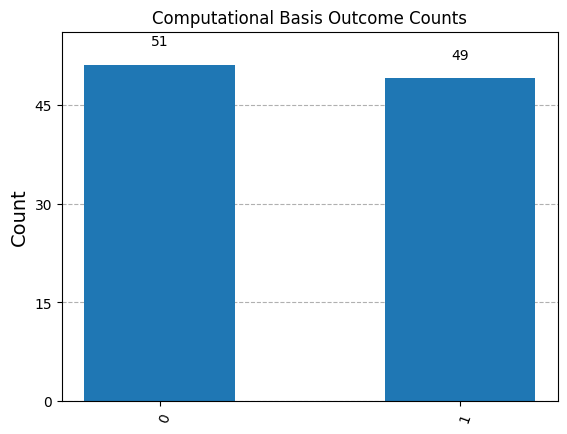

In [ ]:
#3.2.b

# Transpile for simulator
simulator = AerSimulator()
qc_sim = transpile(qc, simulator)

#Run the transpiled circuit
result = simulator.run(qc_sim, shots=100).result()
counts = result.get_counts(qc_sim)
plot_histogram(counts, title='Computational Basis Outcome Counts')

**Answer:** I know it's simulated because the number of outcome counts varies.

## Exercises 4 (Multiqubit Circuits)

With the introduction of multiple qubits, we can begin simulating general quantum circuits. Here we will just study the production of the maximally entangled state $ \vert \Phi^{+} \rangle = \frac{1}{\sqrt{2}}\left( \vert 00 \rangle_{AB} + \vert 11 \rangle_{AB} \right)$.

### Problem 4.1 (Building a Maximally Entangled State)

**Problem 4.1.a** Build a quantum circuit with two qubits and two classical bits by modifying previous code you used. Verify this works by printing the circuit.

In [ ]:
# 4.1.a
num_qubits = 2
num_cbits = 2
qc = QuantumCircuit(num_qubits,num_cbits)
print(qc)

     
q_0: 
     
q_1: 
     
c: 2/
     


**Problem 4.1.b** Apply a Hadamard to the zero-th qubit and then apply CNOT where the zero-th qubit is the control qubit and the first qubit is the target qubit. Print the circuit to make sure you got the order of gates correct.

**Syntax Hint:** The CNOT gate is denoted `cx(number-of-register-control-qubit,number-of-register-of-target-qubt)`. It is denoted as `cx` because as we saw in the lecture, it is the controlled version of the Pauli X gate.

In [ ]:
# 4.1.b
qc.h(0)
qc.cx(0,1)
print(qc)

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════
               


**Problem 4.1.c** Use the `evolve` method on $\vert 00 \rangle$ and check the resulting state by plotting a histogram of the outcomes as we did for the quantum random number generator in Problem 3.1. Explain what you see. To initialize the state vector, instead use `Statevector.from_label('00')`.

**Bonus:** See if you can instead initialize the vector by writing the $\vert 00 \rangle$ as a vector.

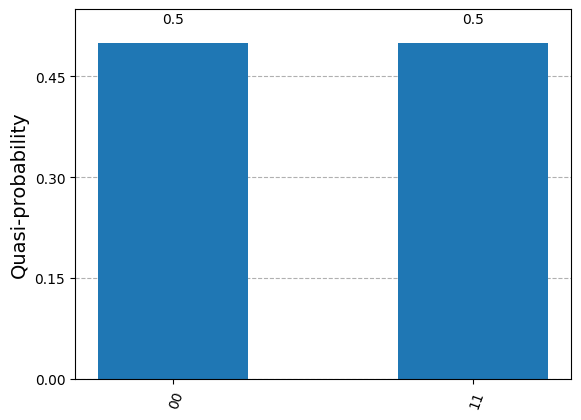

In [ ]:
# 4.1.c
init_sv = Statevector.from_label('00')
final_sv = init_sv.evolve(qc)
plot_histogram(final_sv.probabilities_dict())

**Answer:** We see that the outcomes are perfectly correlated, but uniformly random over possible outcomes.

### Problem 4.2 (Simulating Measuring the Maximally Entangled State)

**Problem 4.2.a** To simulate the circuit, we will need to measure the outputs into classical registers like we did in Problem 3. Use the `measure` method to measure the $i^{th}$ qubit into the $i^{th}$ classical register. Print the circuit to make sure this is done properly.

In [ ]:
# 4.2.a
qc.measure(0,0)
qc.measure(1,1)
print(qc)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


**Problem 4.2.b** Use the simulator code just like in Problem 3.2 to simulate preparing and measuring entangled states.

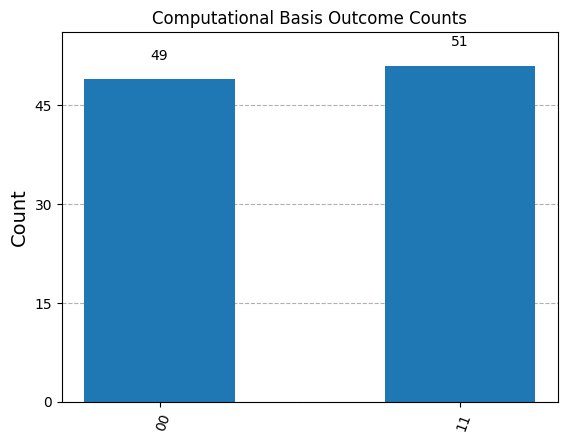

In [ ]:
#4.2.b

# Transpile for simulator
simulator = AerSimulator()
qc_sim = transpile(qc, simulator)

#Run the transpiled circuit
result = simulator.run(qc_sim, shots=100).result()
counts = result.get_counts(qc_sim)
plot_histogram(counts, title='Computational Basis Outcome Counts')

### Problem 4.3 (Hadamard Basis Correlation)
We now have all the tools, so all parts of the problem are stated at once. \\
a. Re-do the circuit in Problem 4.2 so that it applies Hadamard gates to each register before the measurements. Print the circuit before simulating to make sure it looks correct. \\
b. Explain why the circuit in part a is like measuring in the `Hadamard Basis' \\
c. Look at the simulated outcomes. What does this tell you?  



In [ ]:
# 4.3.a
num_qubits = 2
num_cbits = 2
qc = QuantumCircuit(num_qubits,num_cbits)
qc.h(0)
qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.measure(0,0)
qc.measure(1,1)
print(qc)

     ┌───┐     ┌───┐┌─┐   
q_0: ┤ H ├──■──┤ H ├┤M├───
     └───┘┌─┴─┐├───┤└╥┘┌─┐
q_1: ─────┤ X ├┤ H ├─╫─┤M├
          └───┘└───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 


**Answer to 4.3.b:** As the measurement is in the computational basis on each register, we can "absorb" the Hadamard acting on the $i^{th}$ register into the definition of the basis of the measurement, so measuring in $\{H\vert 0 \rangle, H\vert 1 \rangle\} = \{\vert + \rangle, \vert - \rangle \}$, which is measuring in the Hadamard basis.

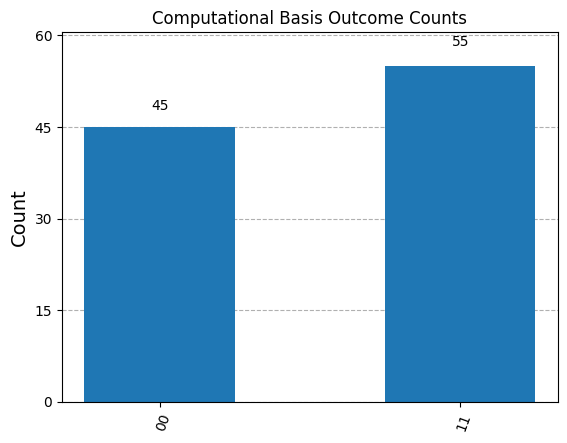

In [ ]:
# 4.3.c

# Transpile for simulator
simulator = AerSimulator()
qc_sim = transpile(qc, simulator)

#Run the transpiled circuit
result = simulator.run(qc_sim, shots=100).result()
counts = result.get_counts(qc_sim)
plot_histogram(counts, title='Computational Basis Outcome Counts')

**Answer:** This shows that both parties measuring in the Hadamard basis is also perfectly correlated. This is a key idea for verifying entanglement as one can define perfectly correlated classical random distributions.